Prevalence of Disease
---

The larger query has examined the presence and rate of occurence of certain disease names in corpus. Here we want 1) to look at this data, 2) graph it per year, and eventually 3) compare these diseases. We will also need to 4) normalise the data, to account for increased publishing activity over time.


Import relevant libraries and data
----

In [1]:
#!pip install --user PyYAML
#!pip install --user matplotlib==2.2.3

In [2]:
import os
import os.path
import site
os.environ["PYTHONPATH"] = site.USER_BASE + "/lib/python/site-packages:" + os.environ["PYTHONPATH"]

In [3]:
!echo $PYTHONPATH

/home/users/michaelj/.local/lib/python/site-packages:/usr/bin/python


In [4]:
import yaml
import matplotlib.pyplot as plt

Here, change the search term and the result file by commenting out the ones you don't want to use

In [5]:
#disease_list=["whooping", "cancer", "consumption", "diphtheria", "measles", "smallpox", "typhoid", "cholera" , \
#              "diarrhoea", "dysentry", "phthisis", "tuberculosis", "typhus", ]

disease_list = ["whooping", "measles", "cholera", "consumption"]

In [6]:
results = {}
for disease in disease_list:
    filename = os.path.join("data", disease + ".yml")
    print(filename)
    with open(filename, 'r') as f:
        disease_results = yaml.load(f)
        results[disease] = disease_results[disease]
        print(results[disease])

data/whooping.yml
{1799: 3, 1801: 2, 1805: 2, 1806: 1, 1807: 1, 1809: 1, 1810: 2, 1811: 3, 1812: 6, 1813: 6, 1814: 5, 1815: 2, 1816: 5, 1817: 6, 1818: 5, 1819: 4, 1820: 2, 1821: 3, 1822: 2, 1823: 4, 1824: 1, 1825: 5, 1826: 3, 1827: 15, 1828: 5, 1829: 6, 1830: 1, 1831: 3, 1832: 3, 1833: 5, 1834: 6, 1835: 13, 1836: 11, 1837: 5, 1838: 8, 1839: 13, 1840: 14, 1841: 11, 1842: 14, 1843: 3, 1844: 17, 1845: 10, 1846: 19, 1847: 7, 1848: 10, 1849: 34, 1850: 18, 1851: 22, 1852: 25, 1853: 15, 1854: 13, 1855: 15, 1856: 13, 1857: 17, 1858: 5, 1859: 16, 1860: 37, 1861: 19, 1862: 19, 1863: 27, 1864: 20, 1865: 27, 1866: 21, 1867: 25, 1868: 37, 1869: 39, 1870: 35, 1871: 14, 1872: 28, 1873: 28, 1874: 25, 1875: 33, 1876: 26, 1877: 25, 1878: 37, 1879: 42, 1880: 44, 1881: 34, 1882: 72, 1883: 42, 1884: 59, 1885: 53, 1886: 25, 1887: 35, 1888: 42, 1633: 2, 1890: 87, 1891: 48, 1892: 112, 1893: 62, 1894: 48, 1639: 1, 1896: 56, 1897: 92, 1898: 60, 1895: 56, 1660: 4, 1661: 3, 1664: 2, 1668: 1, 1678: 2, 1679: 1, 168

Plot for: whooping


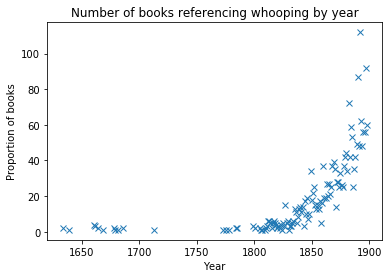

Plot for: measles


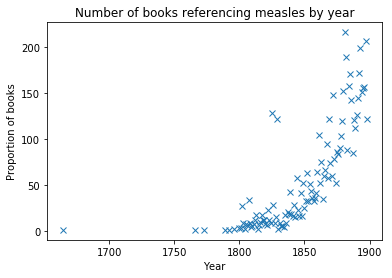

Plot for: cholera


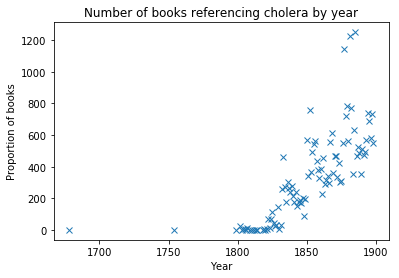

Plot for: consumption


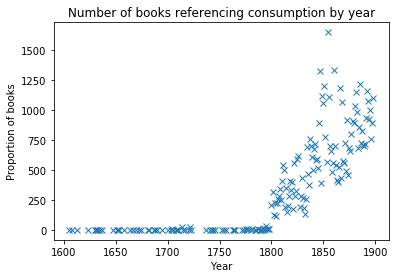

In [7]:
for disease in disease_list:
    print('Plot for: ' + disease)
    plt.plot(results[disease].keys(), results[disease].values(), 'x')
    plt.xlabel('Year')
    plt.ylabel('Proportion of books')
    plt.title('Number of books referencing ' + disease + ' by year')
    plt.show()

Bokeh
---

Bokeh is a library which lets us create interactive web-based graphs and charts.

Here, we're importing the libary, creating a graph with appropriate axis names, and displaying it in a web browser. We could put this on a web server or embed it in an html page (one which allows JavaScript).


In [8]:
#!pip install --user bokeh==0.13.0

In [9]:
from bokeh.plotting import figure, output_file, show, reset_output

In [10]:
bokeh_output = os.path.join(".", "html")
for disease in disease_list:
    reset_output()
    filename = os.path.join(bokeh_output, disease + ".html")
    print(filename)
    output_file(filename, title="Number of books referencing " + disease + " by year")
    p = figure(title=disease + " references", x_axis_label='Year', y_axis_label='Number of books')
    p.line(results[disease].keys(), results[disease].values())
    show(p)

./html/whooping.html
./html/measles.html
./html/cholera.html
./html/consumption.html


Normalisation
---

Here, we are examining the total number of books published over the period to see how much our search terms are affected by the way that the number of books (and pages, and words!) published increases over the measurement period.

These stages carry out **normalisation**: dividing the per year word occurence with the per year book occurence to get a words per book per year measure. 

**With new data we can normalise this as a ratio of words/word**


In [11]:
results = {}
for disease in disease_list:
    filename = os.path.join("data", disease + ".yml")
    print(filename)
    with open(filename, 'r') as f:
        disease_results = yaml.load(f)
        results[disease] = disease_results[disease]

data/whooping.yml
data/measles.yml
data/cholera.yml
data/consumption.yml


In [12]:
normal_filename = 'normaliser.yml'
normal_path = os.path.join("data", normal_filename)
with open(normal_path, 'r') as f:
    publication = yaml.load(f)

In [13]:
normed_results = {}
for disease in disease_list:
    print(disease)
    disease_normed_results = {}
    for year in results[disease]:
        if year > 0:
            disease_normed_results[year] = results[disease][year]/float(publication[year][0])
    normed_results[disease] = disease_normed_results
    print(normed_results[disease])

whooping
{1633: 0.09523809523809523, 1639: 0.07142857142857142, 1660: 1.0, 1661: 0.14285714285714285, 1664: 0.3333333333333333, 1668: 0.09090909090909091, 1678: 0.1, 1679: 0.06666666666666667, 1681: 0.07692307692307693, 1686: 0.2857142857142857, 1713: 0.0625, 1773: 0.02702702702702703, 1775: 0.023255813953488372, 1778: 0.02127659574468085, 1784: 0.09090909090909091, 1785: 0.046511627906976744, 1799: 0.08571428571428572, 1801: 0.011494252873563218, 1805: 0.011695906432748537, 1806: 0.00546448087431694, 1807: 0.005154639175257732, 1809: 0.006024096385542169, 1810: 0.009478672985781991, 1811: 0.015873015873015872, 1812: 0.027906976744186046, 1813: 0.03773584905660377, 1814: 0.02074688796680498, 1815: 0.008733624454148471, 1816: 0.018315018315018316, 1817: 0.020477815699658702, 1818: 0.013333333333333334, 1819: 0.013377926421404682, 1820: 0.0061162079510703364, 1821: 0.011235955056179775, 1822: 0.006211180124223602, 1823: 0.016, 1824: 0.00398406374501992, 1825: 0.015337423312883436, 1826: 

Plot for: whooping


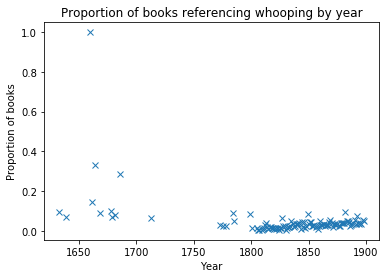

Plot for: measles


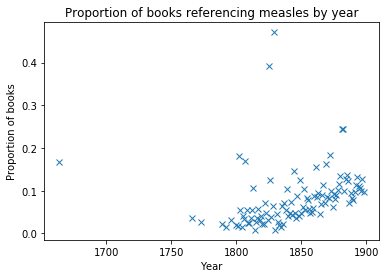

Plot for: cholera


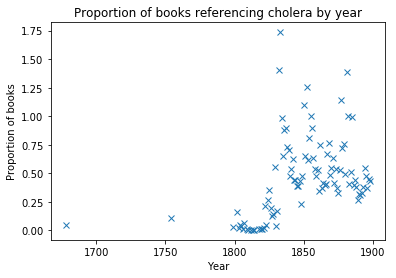

Plot for: consumption


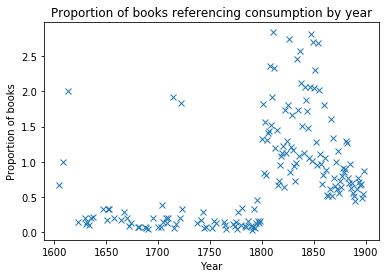

In [14]:
for disease in disease_list:
    print('Plot for: ' + disease)
    plt.plot(normed_results[disease].keys(), normed_results[disease].values(), 'x')
    plt.xlabel('Year')
    plt.ylabel('Proportion of books')
    plt.title('Proportion of books referencing ' + disease + ' by year')
    plt.show()

In [15]:
for disease in disease_list:
    reset_output()
    filename = os.path.join(bokeh_output, disease + "-normalised.html")
    print(filename)
    output_file(filename, title="Proportion of books referencing " + disease + " by year")
    p = figure(title=disease + " references", x_axis_label='Year', y_axis_label='Number of books')
    p.scatter(normed_results[disease].keys(), normed_results[disease].values())
    show(p)

./html/whooping-normalised.html
./html/measles-normalised.html
./html/cholera-normalised.html
./html/consumption-normalised.html
